In [112]:
from nn import Layer, NN, Adam, SGD, Momentum
from metricas import metricas_one_vs_all

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

*Función Lógica "XOR":* Se verifica que poniendo una capa no-lineal se tiene una correcta salida del problema.

In [174]:
def create_nn():
    l1 = Layer(2, 10, activation_function="sigmoid")
    l2 = Layer(10, 1, activation_function="sigmoid")
    optimizer = Momentum()
    return NN([l1, l2], optimizer)

x = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
y = np.array([1, 1, 0, 0])


N = 10
epochs_step = 500
resultados = []

for corrida in range(N):
    nn = create_nn()

    for e in range(0, 2500, epochs_step):
        result = nn.train(x, y, epochs=epochs_step, batch_size=len(x))
        y_hat = np.round(nn.predict(x)).reshape(y.shape)
        error = sum((y_hat - y)**2) / 2
        
        tp = sum((yt == 1 and yp == 1) for yt, yp in zip(y, y_hat))
        tn = sum((yt != 1 and yp != 1) for yt, yp in zip(y, y_hat))
        fp = sum((yt != 1 and yp == 1) for yt, yp in zip(y, y_hat))
        fn = sum((yt == 1 and yp != 1) for yt, yp in zip(y, y_hat))

        resultados.append({
            "corrida": corrida,
            "errores": error,
            "epochs" : e + epochs_step,
            "tp": tp,
            "tn": tn,
            "fp": fp,
            "fn": fn,
            "recall": tp / (tp + fn)
        })

[]

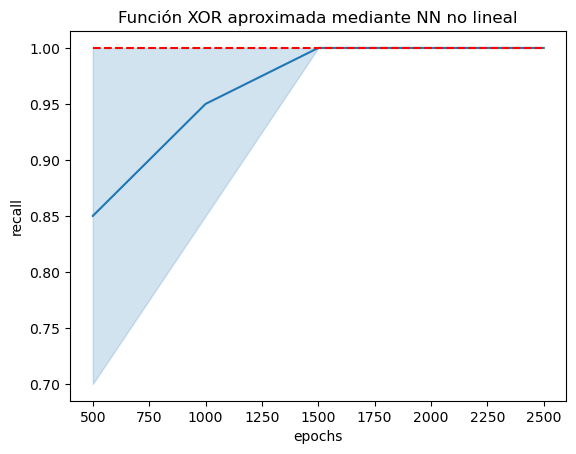

In [177]:
data = pd.DataFrame(resultados)
sns.lineplot(data, x="epochs", y="recall")
plt.hlines(1, xmin=data.epochs.min(), xmax=data.epochs.max(), color="r", linestyles="dashed")
plt.title("Función XOR aproximada mediante NN no lineal")
plt.plot()

Si se tienen funciones de activación lineales se sigue teniendo un problema lineal que no permitirá representar la función XOR

In [176]:
l1 = Layer(2, 2, activation_function="linear")
l2 = Layer(2, 1, activation_function="linear")
optimizer = Adam()
nn = NN([l1, l2], optimizer)

x = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
y = np.array([1, 1, -1, -1])

nn.train(x, y, epochs=3000)

print("Función de activación lineal")
for xi in x:
    print(f"Entrada: {xi}, \tSalida: {round(nn.forward(xi)[0])}")

Función de activación lineal
Entrada: [-1  1], 	Salida: 0
Entrada: [ 1 -1], 	Salida: 0
Entrada: [-1 -1], 	Salida: 0
Entrada: [1 1], 	Salida: 0


In [182]:
def create_nn():
    l1 = Layer(2, 10, activation_function="linear")
    l2 = Layer(10, 1, activation_function="linear")
    optimizer = Momentum()
    return NN([l1, l2], optimizer)

x = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
y = np.array([1, 1, 0, 0])


N = 10
epochs_step = 500
resultados = []

for corrida in range(N):
    nn = create_nn()

    for e in range(0, 2500, epochs_step):
        result = nn.train(x, y, epochs=epochs_step, batch_size=len(x))
        y_hat = np.round(nn.predict(x)).reshape(y.shape)
        error = sum((y_hat - y)**2) / 2
        
        tp = sum((yt == 1 and yp == 1) for yt, yp in zip(y, y_hat))
        tn = sum((yt != 1 and yp != 1) for yt, yp in zip(y, y_hat))
        fp = sum((yt != 1 and yp == 1) for yt, yp in zip(y, y_hat))
        fn = sum((yt == 1 and yp != 1) for yt, yp in zip(y, y_hat))

        resultados.append({
            "corrida": corrida,
            "errores": error,
            "epochs" : e + epochs_step,
            "tp": tp,
            "tn": tn,
            "fp": fp,
            "fn": fn,
            "recall": tp / (tp + fn)
        })

[]

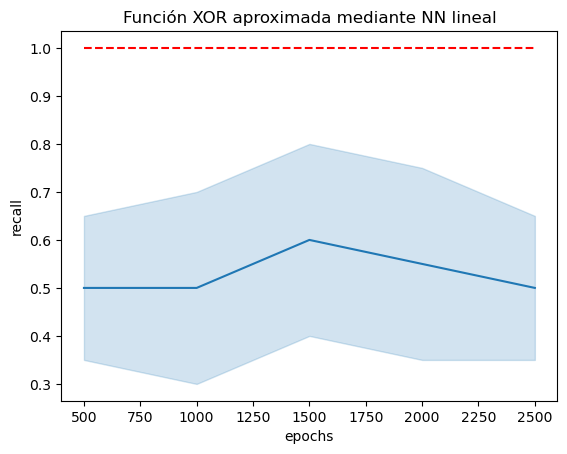

In [183]:
data = pd.DataFrame(resultados)
sns.lineplot(data, x="epochs", y="recall")
plt.hlines(1, xmin=data.epochs.min(), xmax=data.epochs.max(), color="r", linestyles="dashed")
plt.title("Función XOR aproximada mediante NN lineal")
plt.plot()

*Discriminación de paridad:* Particularmente, este ejercicio presenta una región de separación de clases $\{Par, Impar\}$ que es periodica, lo cual utilizar una función del tipo no lineal aperiodica no permitirá generalizar correctamente.

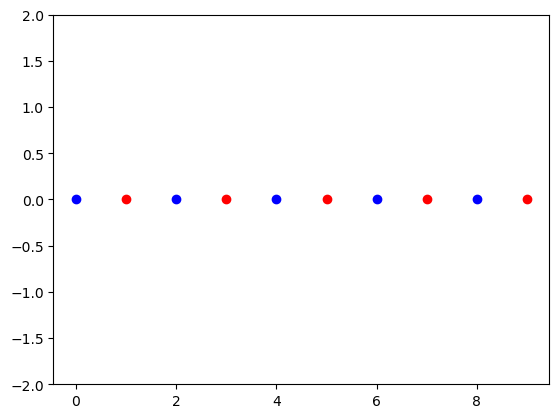

In [184]:
x = np.array([xi for xi in range(10)])
y = x.reshape(-1) % 2

for pts in zip(x, y):
    plt.scatter(pts[0], 0, color="red" if pts[-1] == 1 else "blue")

plt.ylim(-2, 2)
plt.show()

Una posible idea puede ser utilizar una función periodica, como la función $y = cos(w\cdot x)$.
De un analisis simple para conjunto de numeros enteros, podemos encontrar que con $w = (2k+1)\pi$ se obtiene una correcta separación del espacio solución.

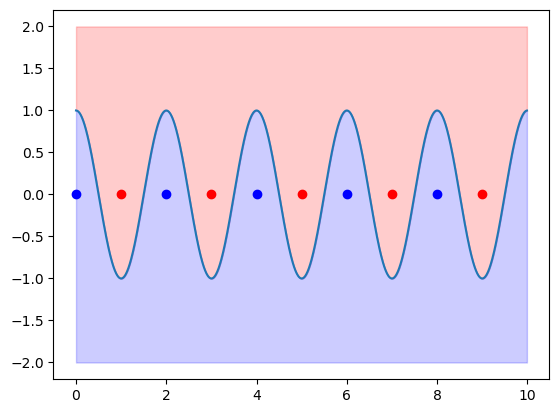

In [185]:
x = np.array([xi for xi in range(10)])
y = x.reshape(-1) % 2

for pts in zip(x, y):
    plt.scatter(pts[0], 0, color="red" if pts[-1] == 1 else "blue")

x_range = np.arange(0, 10, 0.01)

k = 0
w = (2*k + 1) * np.pi
cos_x = np.cos(w * x_range)

plt.fill_between(x_range, cos_x,  2, alpha=0.2, color="red")
plt.fill_between(x_range, cos_x, -2, alpha=0.2, color="blue")
plt.plot(x_range, cos_x)
plt.show()

Para este caso la estructura de la red es tan simple como una capa de perceptron no-lineal con una función cosenoidal y la capa de salida una función logistica para tener los valores entre $0: Par, 1: Impar$

Entrada: [0], 	Salida: 0
Entrada: [1], 	Salida: 1
Entrada: [2], 	Salida: 0
Entrada: [3], 	Salida: 1
Entrada: [4], 	Salida: 0
Entrada: [5], 	Salida: 1
Entrada: [6], 	Salida: 0
Entrada: [7], 	Salida: 1
Entrada: [8], 	Salida: 0
Entrada: [9], 	Salida: 1


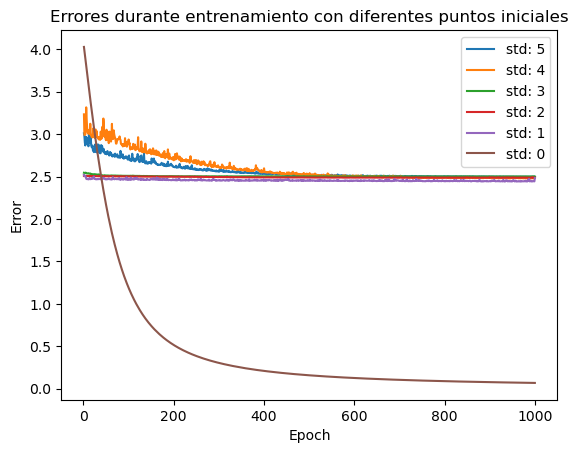

In [186]:
N = 20
x = np.array([[xi] for xi in range(N)])
y = x.reshape(-1) % 2


for std in [5, 4, 3, 2, 1, 0]:
    l1 = Layer(1, 1, activation_function="cosine")
    l2 = Layer(1, 1, activation_function="sigmoid")
    nn = NN([l1, l2])
    
    # Inicializamos los pesos con valores no aleatorios
    k = 0
    w = (2*k + 1) * np.pi
    
    l1.w = np.array([[w + std * np.random.randn()]])
    results = nn.train(x, y, epochs=1000, batch_size=N)
    plt.plot(results["epoch"], results["total_loss"], label="std: {}".format(std))

for xi in x[0:10]:
    print(f"Entrada: {xi}, \tSalida: {round(nn.forward(xi)[0])}")

plt.legend()
plt.title("Errores durante entrenamiento con diferentes puntos iniciales")
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.show()

Otra opción es prepocesar los datos de otra manera, quizas representar el numero como un vector que sea su representación en base 2 sería una conveniente representación de la información. La gracia de esto es que el ultimo bit será 0 o 1 y se podrá determinar facilmente la paridad con ese valor.

In [187]:
x = np.array([[xi] for xi in range(10)])
y = x.reshape(-1) % 2

x_transformed = []
vector_size = x.max() // 2
to_base2_vector = lambda x: [int(d) for d in np.base_repr(x, base=2).zfill(vector_size)]

x_transformed = np.array([to_base2_vector(xi[0]) for xi in x])
y_transformed = y

l1 = Layer(vector_size, 1, activation_function="linear")
nn = NN([l1])

nn.train(x_transformed, y_transformed, epochs=2000)

for xi in x:
    print(f"Entrada: {xi}, \tSalida: {int(np.round(nn.forward(to_base2_vector(xi[0]))[0]))}")

Entrada: [0], 	Salida: 0
Entrada: [1], 	Salida: 1
Entrada: [2], 	Salida: 0
Entrada: [3], 	Salida: 1
Entrada: [4], 	Salida: 0
Entrada: [5], 	Salida: 1
Entrada: [6], 	Salida: 0
Entrada: [7], 	Salida: 1
Entrada: [8], 	Salida: 0
Entrada: [9], 	Salida: 1


Notesé que el problema ahora es facilmente separable con un plano.

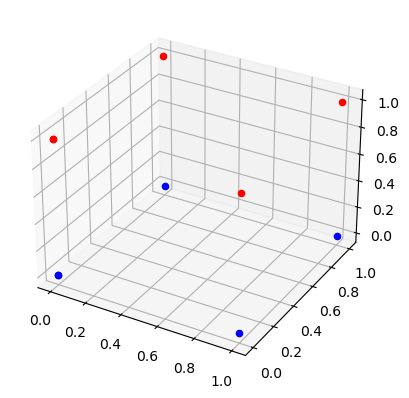

In [188]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for xi in x_transformed:
    ax.scatter(xi[1], xi[2], xi[3], color="red" if xi[-1] == 1 else "blue")

*Discriminación de dígito:*

In [189]:
# Generacion del dataset
data = pd.read_csv("../data/TP3-ej3-digitos.txt", header=None, sep=" ").dropna(axis=1)
data = data.to_numpy()

x = []
y = []
numero = 0
for i in range(0, data.shape[0], 7):
    x.append(data[i:i+7].reshape(-1))
    
    out = np.zeros(10)
    out[numero] = 1
    y.append(out)
    numero += 1

x = np.array(x)
y = np.array(y)

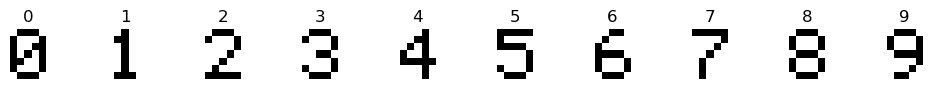

In [190]:
# Representación de los datos
fig, ax = plt.subplots(1, 10, figsize=(10, 1))
for i in range(10):
    ax[i].imshow(1 - x[i].reshape(7, 5), cmap="gray")
    ax[i].set_title(np.argmax(y[i]))
    ax[i].axis("off")
plt.tight_layout()
plt.show()

In [191]:
l1 = Layer(35, 10, activation_function="sigmoid")
l2 = Layer(10, 10, activation_function="sigmoid")

optimizer = SGD()
nn = NN([l1, l2], optimizer)

results = nn.train(x, y)

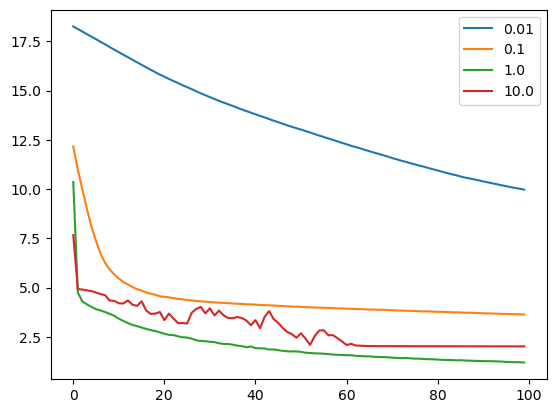

In [192]:

for lr in [0.01, 0.10, 1.00, 10.00]:
    optimizer = SGD()
    optimizer.learning_rate = lr

    l1 = Layer(35, 10, activation_function="sigmoid")
    l2 = Layer(10, 10, activation_function="sigmoid")
    nn = NN([l1, l2], optimizer)

    results = nn.train(x, y, epochs=100, batch_size=10)
    plt.plot(results["total_loss"], label=lr)

plt.legend()
plt.show()

# Conclusiones

Como principales conclusiones de este trabajo arribamos a que:

* El perceptrón no lineal demuestra su capacidad para resolver problemas no linealmente separables, como el caso clásico del XOR, algo que el perceptrón lineal no puede lograr.

* La elección adecuada de la función de activación es crucial para capturar la no linealidad presente en problemas como XOR y paridad.

* Es importante contar con una idea clara del problema a resolver para poder elegir adecuadamente la representación de la información de entrada.

* El tratamiento previo de los datos es fundamental para lograr una representación útil y efectiva que facilite el aprendizaje del modelo.